# Python Program for components of Time Series. Level, Seasonality, Trend , Noise

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
# Create an array for 12 months
months = np.arange(1, 13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [34]:
# Set base sales (Level) for all months
level = 500

# Create an increasing trend: +10 units each month
trend = 10 * months
level, trend


(500, array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]))

In [27]:

# Final sales = Level + Trend + Seasonality + Noise
sales = level + trend + seasonality + noise
sales

array([521, 511, 521, 556, 533, 542, 580, 598, 598, 607, 605, 654])

In [35]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [36]:
# Add seasonality: +50 units only in December (month 12)
seasonality = [50 if m == 12 else 0 for m in months]

# Add random noise between -20 and +20 units
noise = np.random.randint(-20, 21, size=12)
print (seasonality,noise)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50] [ -7  10  -6 -13  -7   2  19   0  -5  -3   3   5]


In [37]:
# Create DataFrame for better viewing
df = pd.DataFrame({
    "Month": months,
    "Level": level,
    "Trend": trend,
    "Seasonality": seasonality,
    "Noise": noise,
    "Sales": sales
})
df

,Month,Level,Trend,Seasonality,Noise,Sales
0,1,500,10,0,-7,521
1,2,500,20,0,10,511
2,3,500,30,0,-6,521
3,4,500,40,0,-13,556
4,5,500,50,0,-7,533
5,6,500,60,0,2,542
6,7,500,70,0,19,580
7,8,500,80,0,0,598
8,9,500,90,0,-5,598
9,10,500,100,0,-3,607


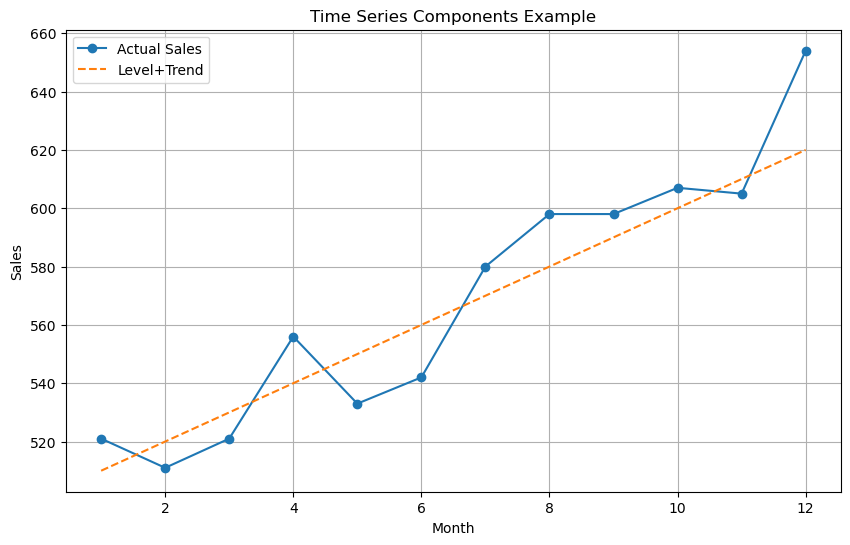

In [38]:

# Plot actual sales and Level+Trend for comparison
plt.figure(figsize=(10,6))

plt.plot(months, sales, marker='o', label="Actual Sales")

plt.plot(months, level + trend, linestyle="--", label="Level+Trend")

plt.title("Time Series Components Example")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# plt.plot() → plots a line connecting data points in the given order.

# marker='o' → shows dots at each data point for clarity.

# plt.grid(True) → adds grid lines to the background for easier reading.


### Observation about graph

The blue line (Actual Sales) shows our simulated monthly sales, which are influenced by:

A base level of 500 units.

A positive trend adding 10 units each month.

A seasonal spike in December (+50 units).

Random noise that slightly raises or lowers values unpredictably.

The orange dashed line (Level + Trend) is smoother because it does not include seasonality or noise — it shows the underlying growth trend.

Notice in December, the actual sales jump well above the trend line — that’s the seasonal effect.

Random ups and downs in other months are due to noise, which cannot be predicted but is always present in real data.

# Visualization in Time Series


### Definition

Visualization in time series is the process of plotting data points in time order to reveal patterns such as trends, seasonality, or irregular fluctuations.

### Purpose

To understand the overall movement of data.

To identify repeating patterns or seasonality.

To detect outliers or unusual spikes/drops.

To prepare for model selection by checking trends and stationarity visually.



### Graph 1 — Basic Line Plot

Why:

Line plots are the most common way to show time series. They help identify general trends and seasonal spikes.

In [39]:
df

,Month,Level,Trend,Seasonality,Noise,Sales
0,1,500,10,0,-7,521
1,2,500,20,0,10,511
2,3,500,30,0,-6,521
3,4,500,40,0,-13,556
4,5,500,50,0,-7,533
5,6,500,60,0,2,542
6,7,500,70,0,19,580
7,8,500,80,0,0,598
8,9,500,90,0,-5,598
9,10,500,100,0,-3,607


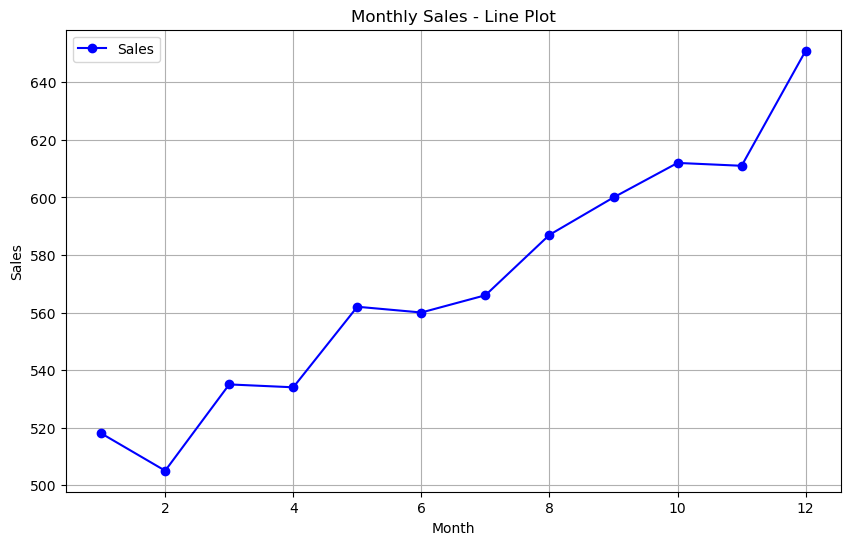

In [13]:
import matplotlib.pyplot as plt

# Basic line plot for Sales over Months

plt.figure(figsize=(10,6))

plt.plot(df["Month"], df["Sales"], marker='o', color='blue', label="Sales")

plt.title("Monthly Sales - Line Plot")

plt.xlabel("Month")

plt.ylabel("Sales")

plt.grid(True)

plt.legend()
plt.show()


### Observation:

Sales generally increase over months (trend).

December shows a clear spike due to seasonality.

Small up-and-down movement each month is due to noise.



### Graph 2 — Seasonal Pattern Plot

Why:

When data covers multiple years, seasonal plots show how each month compares across years. Here, we simulate two years to demonstrate.



In [15]:
# Create two years of data for demonstration
months_2yr = np.tile(np.arange(1, 13), 2)  # repeat 1-12 twice
months_2yr
# np.tile() → repeats a sequence (here, months 1–12 twice).


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12])

In [16]:
year = np.repeat([1, 2], 12)  # year labels

# np.repeat() → repeats each element of an array a specific number of times.

year

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
sales_2yr = np.concatenate([sales, sales + np.random.randint(-15, 16, size=12)])  # add variation in 2nd year
sales_2yr

array([518, 505, 535, 534, 562, 560, 566, 587, 600, 612, 611, 651, 518,
       516, 527, 545, 548, 561, 564, 592, 593, 607, 602, 658])

In [40]:
df_season = pd.DataFrame({
    "Year": year,
    "Month": months_2yr,
    "Sales": sales_2yr
})
df_season

,Year,Month,Sales
0,1,1,518
1,1,2,505
2,1,3,535
3,1,4,534
4,1,5,562
5,1,6,560
6,1,7,566
7,1,8,587
8,1,9,600
9,1,10,612


In [20]:
df_season.tail()

,Year,Month,Sales
19,2,8,592
20,2,9,593
21,2,10,607
22,2,11,602
23,2,12,658


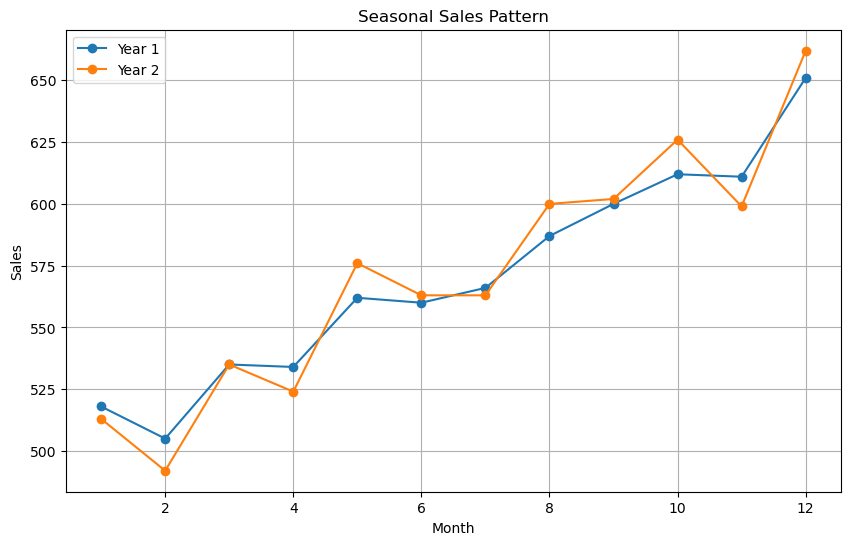

In [14]:

# Seasonal plot using line colors per year

plt.figure(figsize=(10,6))

for y in df_season["Year"].unique():
    subset = df_season[df_season["Year"] == y]
    plt.plot(subset["Month"], subset["Sales"], marker='o', label=f"Year {y}")

#Looping with for over df_season["Year"].unique() lets us plot one line per year.

plt.title("Seasonal Sales Pattern")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


### Observation:

In both years, December peaks are visible — confirming a seasonal effect.

The trend is slightly upward from Year 1 to Year 2.

Year-to-year differences in the same month are due to noise

### Graph 3 — Lag Plot

Why:

Lag plots help check if past values influence current values. A diagonal pattern suggests autocorrelation.




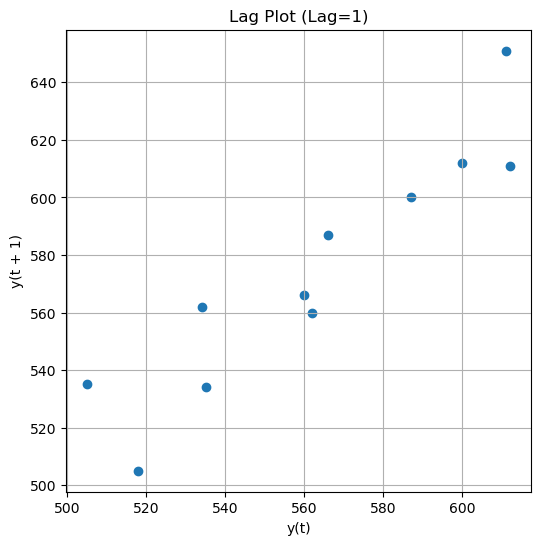

In [21]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6,6))
lag_plot(df["Sales"], lag=1)  # lag=1 means comparing month t vs month t-1

# lag_plot(series, lag=n) → plots each point at (t, t–n), showing how a past value relates to the current value.


plt.title("Lag Plot (Lag=1)")
plt.grid(True)
plt.show()


### Observation:

Points are somewhat aligned along a diagonal — indicating positive correlation between sales in consecutive months.

Strong clustering along the diagonal means past values are a good predictor of the next.

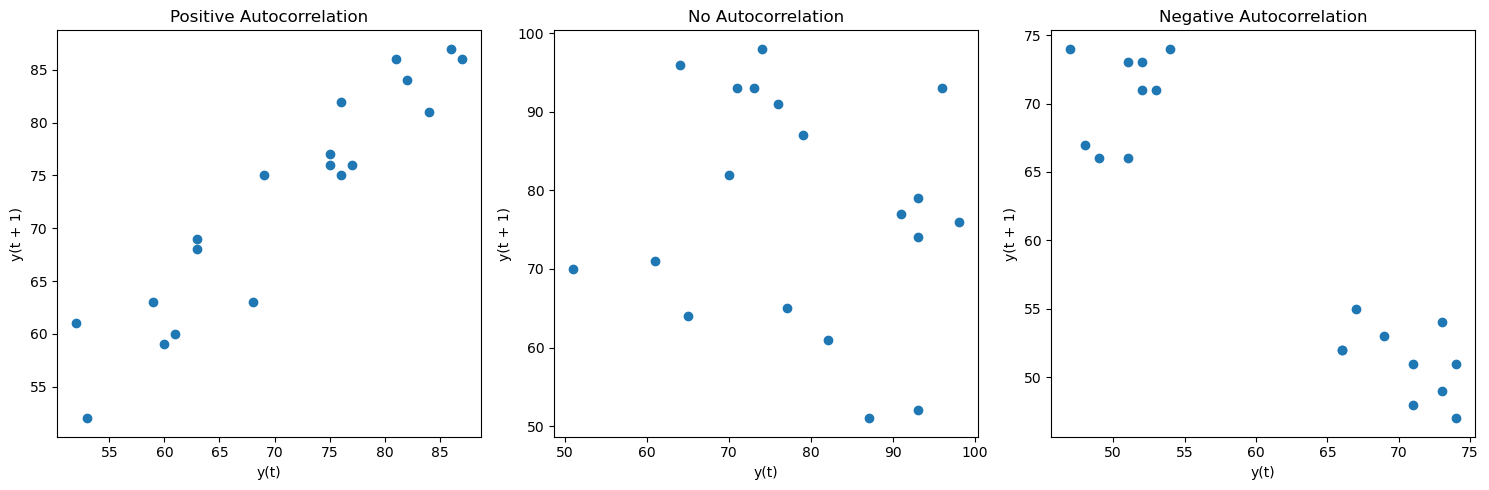

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

np.random.seed(42)  # for reproducibility

# 1. Positive autocorrelation (trend + small noise)
months = np.arange(1, 21)
positive_series = 50 + months * 2 + np.random.randint(-5, 6, size=20)

# 2. No autocorrelation (pure random noise)
no_corr_series = np.random.randint(50, 100, size=20)

# 3. Negative autocorrelation (alternating up and down)
neg_series = np.array([60 + ((-1)**i) * np.random.randint(5, 15) for i in range(20)])

# Create subplots
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
lag_plot(pd.Series(positive_series), lag=1)
plt.title("Positive Autocorrelation")

plt.subplot(1, 3, 2)
lag_plot(pd.Series(no_corr_series), lag=1)
plt.title("No Autocorrelation")

plt.subplot(1, 3, 3)
lag_plot(pd.Series(neg_series), lag=1)
plt.title("Negative Autocorrelation")

plt.tight_layout()
plt.show()


### Boxplot by Month

Why:

Boxplots show variation and seasonality — useful for comparing months.



<Figure size 1000x600 with 0 Axes>

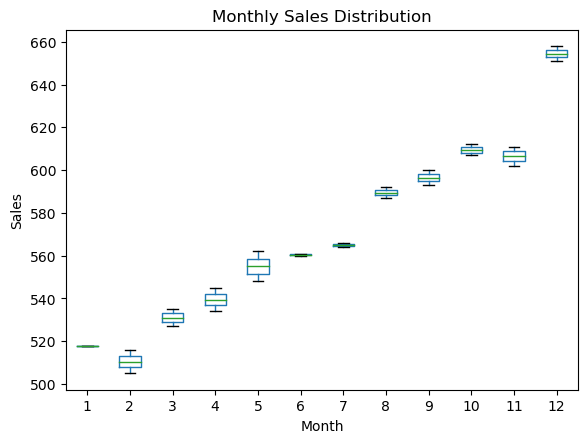

In [23]:
plt.figure(figsize=(10,6))

df_season.boxplot(column="Sales", by="Month", grid=False)

# .boxplot(column="col", by="group") → groups data by a category (month here) and shows median, quartiles, and outliers.

plt.title("Monthly Sales Distribution")
plt.suptitle("")  # removes extra automatic title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


### Observation:

December’s box is higher than other months — confirming seasonal peak.

Spread (height of box) shows month-to-month variability due to noise.



### let us understand Data Preparation Technique in Time series 
